In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly 
import plotly.plotly as py 
import plotly.figure_factory as ff
from plotly.graph_objs import *
from pylab import *
import matplotlib.pyplot as plt
import cufflinks as cf
plotly.tools.set_credentials_file(username='bkeljaba', api_key='jIBy5jbNKdIUxlbVK2Kd')

### Read the food deficit data set with pandas
The food deficit is "how many calories would be needed to lift the undernourished from their status, everything else being constant. The average intensity of food deprivation of the undernourished, estimated as the difference between the average dietary energy requirement and the average dietary energy consumption of the undernourished population (food-deprived), is multiplied by the number of undernourished to provide an estimate of the total food deficit in the country, which is then normalized by the total population"("Depth")
https://www.indexmundi.com/facts/indicators/SN.ITK.DFCT

In [2]:
foodDeficit = pd.read_csv("../data/depth_of_the_food_deficit/food_deficit.csv", sep='\t', engine='python', encoding ='latin1')                 
foodDeficit


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,201.000000,184.000000,168.000000,158.000000,151.000000,149.000000,151.000000,158.000000,166.000000,173.000000
2,Angola,AGO,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,209.000000,189.000000,168.000000,149.000000,132.000000,120.000000,111.000000,104.000000,96.000000,90.000000
3,Albania,ALB,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,76.668489,76.026830,75.291664,73.402535,71.547990,55.239727,53.236849,52.198815,51.728930,50.998723
6,United Arab Emirates,ARE,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,24.000000,29.000000,33.000000,35.000000,34.000000,33.000000,30.000000,26.000000,22.000000,18.000000
7,Argentina,ARG,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,12.000000,11.000000,10.000000,10.000000,10.000000,10.000000,8.000000,6.000000,3.000000,2.000000
8,Armenia,ARM,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,58.000000,47.000000,43.000000,43.000000,46.000000,48.000000,49.000000,48.000000,45.000000,41.000000
9,American Samoa,ASM,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
refugee = pd.read_csv("../data/ref_by_c_orig/ref_by_c_orig.csv", engine='python', encoding ='latin1')
refugee

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0,NaN
2,Angola,AGO,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0,NaN
3,Albania,ALB,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0,NaN
4,Andorra,AND,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN,NaN
5,Arab World,ARB,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0,NaN
6,United Arab Emirates,ARE,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0,NaN
7,Argentina,ARG,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0,NaN
8,Armenia,ARM,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,16336.0,18000.0,17547.0,16487.0,15935.0,11998.0,11848.0,11214.0,10687.0,NaN
9,American Samoa,ASM,Refugee population by country or territory of ...,SM.POP.REFG.OR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean the food deficit data set with pandas
1. Any row that is completely empty is dropped
2. Any column that is empty is dropped
3. The Indicator Code column is dropped because it is not needed

In [4]:
def cleanDataSets(df):
    # dropping empty rows 
    df2=df.dropna(subset=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
                 '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all')
    # dropping empty columns 
    df3=df2.dropna(axis=1, how='all')
    df4=df3.drop('Indicator Code',axis=1)
    df5=df4.drop('Indicator Name',axis=1)
    return df5

In [5]:
filteredFoodDeficit = cleanDataSets(foodDeficit)
filteredRefugee = cleanDataSets(refugee)
filteredRefugee

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,6339095.0,6306301.0,4552153.0,3374576.0,2731169.0,2679133.0,2674236.0,2676674.0,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
2,Angola,AGO,407760.0,381636.0,300492.0,323831.0,282577.0,246657.0,249687.0,267696.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
3,Albania,ALB,1822.0,3540.0,4353.0,4744.0,5019.0,5803.0,5785.0,5379.0,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
4,Andorra,AND,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN
5,Arab World,ARB,2212498.0,2408680.0,2614885.0,1906599.0,2001784.0,2005056.0,2035564.0,1864336.0,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,308.0,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0
7,Argentina,ARG,334.0,198.0,113.0,98.0,469.0,330.0,217.0,159.0,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0
8,Armenia,ARM,1.0,1.0,195003.0,200116.0,201842.0,201442.0,203231.0,203690.0,...,15436.0,16336.0,18000.0,17547.0,16487.0,15935.0,11998.0,11848.0,11214.0,10687.0
10,Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,25.0,26.0,28.0,30.0,32.0,45.0,49.0,53.0,56.0,77.0
11,Australia,AUS,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,...,63.0,43.0,28.0,37.0,39.0,48.0,28.0,25.0,20.0,NaN


In [6]:
filteredFoodDeficit

,Country Name,Country Code,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,...,201.000000,184.000000,168.000000,158.000000,151.000000,149.000000,151.000000,158.000000,166.000000,173.000000
2,Angola,AGO,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,...,209.000000,189.000000,168.000000,149.000000,132.000000,120.000000,111.000000,104.000000,96.000000,90.000000
5,Arab World,ARB,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,...,76.668489,76.026830,75.291664,73.402535,71.547990,55.239727,53.236849,52.198815,51.728930,50.998723
6,United Arab Emirates,ARE,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,24.000000,29.000000,33.000000,35.000000,34.000000,33.000000,30.000000,26.000000,22.000000,18.000000
7,Argentina,ARG,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,12.000000,11.000000,10.000000,10.000000,10.000000,10.000000,8.000000,6.000000,3.000000,2.000000
8,Armenia,ARM,177.000000,184.000000,186.000000,190.000000,156.000000,134.000000,116.000000,120.000000,...,58.000000,47.000000,43.000000,43.000000,46.000000,48.000000,49.000000,48.000000,45.000000,41.000000
13,Azerbaijan,AZE,163.000000,164.000000,160.000000,161.000000,175.000000,190.000000,195.000000,202.000000,...,26.000000,24.000000,23.000000,23.000000,21.000000,18.000000,16.000000,15.000000,13.000000,12.000000
16,Benin,BEN,190.000000,187.000000,193.000000,191.000000,186.000000,177.000000,170.000000,167.000000,...,97.000000,90.000000,83.000000,80.000000,78.000000,77.000000,69.000000,60.000000,52.000000,48.000000
17,Burkina Faso,BFA,177.000000,166.000000,156.000000,147.000000,141.000000,140.000000,149.000000,163.000000,...,206.000000,201.000000,196.000000,188.000000,181.000000,174.000000,170.000000,167.000000,167.000000,167.000000
18,Bangladesh,BGD,247.000000,252.000000,264.000000,277.000000,279.000000,270.000000,251.000000,222.000000,...,114.000000,115.000000,117.000000,119.000000,120.000000,121.000000,122.000000,122.000000,120.000000,116.000000


## Put the data frame in a pickle file
This is down because so we do not have to run the above code everytime and can just use the pickle file (pickle file of refugee data already exists

In [7]:
filteredFoodDeficit.to_pickle("food_deficit_pickle")

## Read the data from the pickle file into a data frame then plot
We use the pandas read_pickle function to read the pickle file into a dataframe
(It is loaded into a different data frame just in case the user is starting from this point)

In [8]:
filteredFoodDeficit=pd.read_pickle("food_deficit_pickle")
filteredRefugee = pd.read_pickle("refugee_pickle")
filteredRefugee

,country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,6339095.0,6306301.0,4552153.0,3374576.0,2731169.0,2679133.0,2674236.0,2676674.0,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
2,Angola,AGO,407760.0,381636.0,300492.0,323831.0,282577.0,246657.0,249687.0,267696.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
3,Albania,ALB,1822.0,3540.0,4353.0,4744.0,5019.0,5803.0,5785.0,5379.0,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
4,Andorra,AND,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN
5,Arab World,ARB,2212498.0,2408680.0,2614885.0,1906599.0,2001784.0,2005056.0,2035564.0,1864336.0,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,308.0,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0
7,Argentina,ARG,334.0,198.0,113.0,98.0,469.0,330.0,217.0,159.0,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0
8,Armenia,ARM,1.0,1.0,195003.0,200116.0,201842.0,201442.0,203231.0,203690.0,...,15436.0,16336.0,18000.0,17547.0,16487.0,15935.0,11998.0,11848.0,11214.0,10687.0
10,Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,25.0,26.0,28.0,30.0,32.0,45.0,49.0,53.0,56.0,77.0
11,Australia,AUS,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,...,63.0,43.0,28.0,37.0,39.0,48.0,28.0,25.0,20.0,NaN


In [9]:
combinedRefugeeFoodDef= pd.merge(filteredFoodDeficit,filteredRefugee, how='inner', on ='Country Code')
combinedRefugeeFoodDef 

,Country Name,Country Code,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,...,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,Afghanistan,AFG,202.000000,249.000000,279.000000,312.000000,329.000000,329.000000,322.000000,312.000000,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
1,Angola,AGO,499.000000,509.000000,510.000000,509.000000,485.000000,457.000000,431.000000,412.000000,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
2,Arab World,ARB,71.079824,73.223515,74.453418,76.527191,75.876617,75.659929,76.360234,76.337497,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0
3,United Arab Emirates,ARE,14.000000,13.000000,11.000000,10.000000,9.000000,9.000000,9.000000,9.000000,...,308.0,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0
4,Argentina,ARG,15.000000,12.000000,11.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0
5,Armenia,ARM,177.000000,184.000000,186.000000,190.000000,156.000000,134.000000,116.000000,120.000000,...,15436.0,16336.0,18000.0,17547.0,16487.0,15935.0,11998.0,11848.0,11214.0,10687.0
6,Azerbaijan,AZE,163.000000,164.000000,160.000000,161.000000,175.000000,190.000000,195.000000,202.000000,...,15916.0,16319.0,16939.0,16753.0,16162.0,15537.0,10814.0,10515.0,9710.0,10087.0
7,Benin,BEN,190.000000,187.000000,193.000000,191.000000,186.000000,177.000000,170.000000,167.000000,...,271.0,318.0,411.0,442.0,461.0,457.0,302.0,340.0,412.0,464.0
8,Burkina Faso,BFA,177.000000,166.000000,156.000000,147.000000,141.000000,140.000000,149.000000,163.000000,...,558.0,725.0,990.0,1145.0,1271.0,1460.0,1584.0,1857.0,2148.0,2327.0
9,Bangladesh,BGD,247.000000,252.000000,264.000000,277.000000,279.000000,270.000000,251.000000,222.000000,...,10243.0,10098.0,10432.0,10049.0,10056.0,10161.0,9728.0,10883.0,12173.0,13810.0


## Plot the year on the x axis and country on the y axis. Read in user input for year
At this point it is easier to plot the country on the y axis because I do not know how to make the names horizontal on the x axis. Takes in user input for year and converts it to a string

In [10]:
year = input('Enter year to plot: ')
filteredFoodDeficit.iplot( x=str(year), y='Country Name', kind='scatter', filename='food_deficit'+str(year))

Enter year to plot: 1993


# Ploting using Matplotlib
Plotting the same data in matplotlib seems to give us a graph that is harder to read in terms of the axises

Enter year to plot: 1993


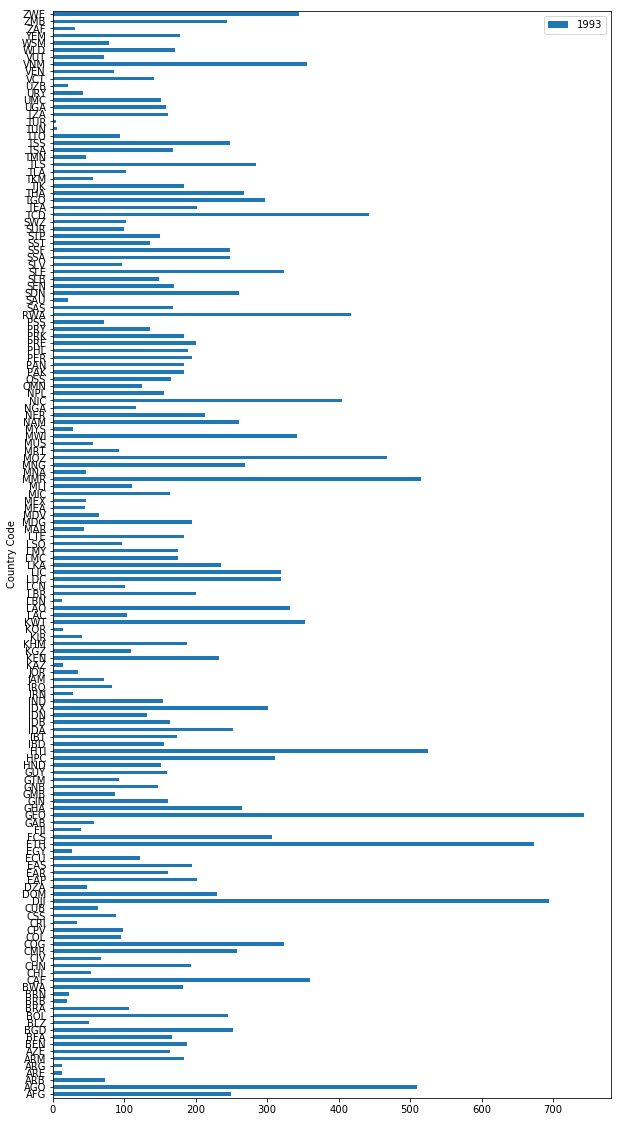

In [11]:
year = input('Enter year to plot: ')
filteredFoodDeficit.plot(kind='barh', x='Country Code', y=str(year), figsize=(10,20))

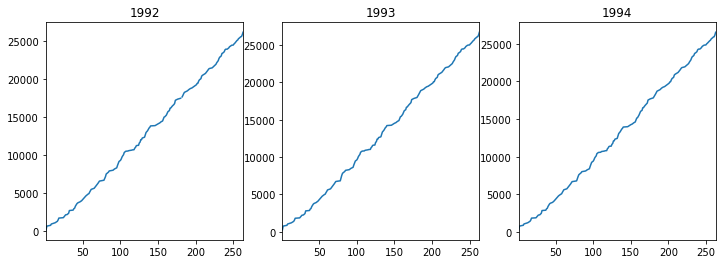

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['1992','1993','1994']):
    filteredFoodDeficit[var].cumsum(0).plot(ax=axes[i], title=var)

C:\Users\Basheer\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Basheer\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\Basheer\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

C:\Users\Basheer\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.



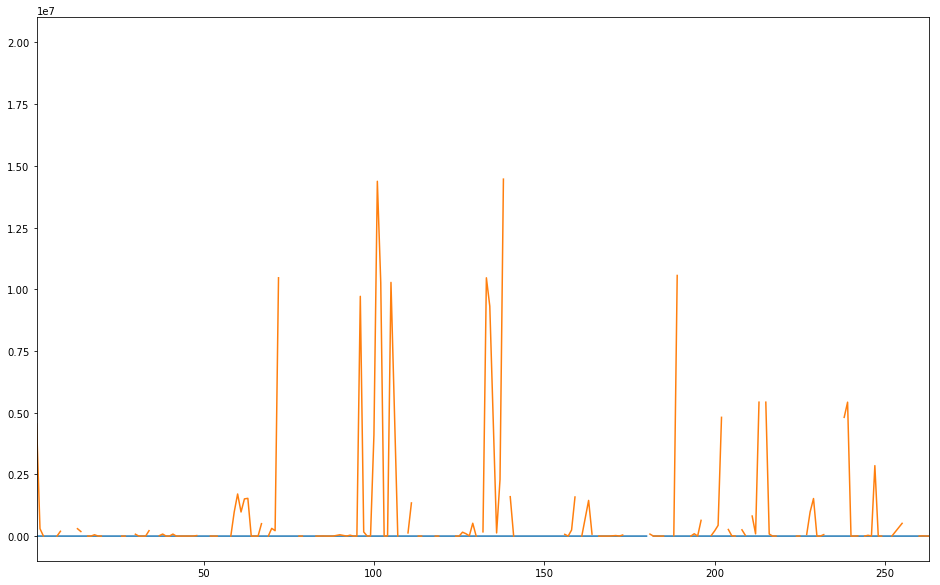

In [21]:
ax = None
ax = filteredFoodDeficit['1992'].plot(x='Time', y='deficit', figsize=(16, 10), ax=ax)
plt.hold(True)
ax = filteredRefugee['1992'].plot(x='Time', y='deficit', figsize=(16, 10), ax=ax)
plt.hold(True)

plt.show()

### I want to be able to easily look at every year for one country. It is easier to do this by setting the index column to name of countries when reading the csv

In [16]:

refugeeByYear = pd.read_csv("../data/ref_by_c_orig/ref_by_c_orig.csv", engine='python', encoding ='latin1',
                         index_col='Country Name')                 
filteredRefugeeByYear = cleanDataSets(refugeeByYear)
filteredRefugeeByYear

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,6339095.0,6306301.0,4552153.0,3374576.0,2731169.0,2679133.0,2674236.0,2676674.0,2667115.0,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
Angola,AGO,407760.0,381636.0,300492.0,323831.0,282577.0,246657.0,249687.0,267696.0,319430.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
Albania,ALB,1822.0,3540.0,4353.0,4744.0,5019.0,5803.0,5785.0,5379.0,5353.0,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
Andorra,AND,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,2.0,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,NaN
Arab World,ARB,2212498.0,2408680.0,2614885.0,1906599.0,2001784.0,2005056.0,2035564.0,1864336.0,1806135.0,...,3722824.0,3328247.0,3029306.0,3034372.0,3205416.0,3359110.0,4804384.0,6200005.0,7077207.0,7702745.0
United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,...,308.0,256.0,414.0,424.0,486.0,584.0,90.0,90.0,99.0,103.0
Argentina,ARG,334.0,198.0,113.0,98.0,469.0,330.0,217.0,159.0,142.0,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0
Armenia,ARM,1.0,1.0,195003.0,200116.0,201842.0,201442.0,203231.0,203690.0,193150.0,...,15436.0,16336.0,18000.0,17547.0,16487.0,15935.0,11998.0,11848.0,11214.0,10687.0
Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,25.0,26.0,28.0,30.0,32.0,45.0,49.0,53.0,56.0,77.0


##### Transpose filteredRefugeeByYear data to switch columns and rows and drop country code so it will not attempt to plot it

In [18]:
filteredRefugeeByYear=filteredRefugeeByYear.T
filteredRefugeeByYear
filteredRefugeeByYear=filteredRefugeeByYear.drop(['Country Code'])

ValueError: labels ['Country Code'] not contained in axis

In [ ]:
filteredRefugeeByYear.plot(kind='barh', figsize=(10,20))